# <b style="color:aqua">Outliers</b>

## <b style="color:green">Z-Score (Standard Score)</b>
- It apply on that columns, which is _Normaly Distributed_ or _Approx Normaly Distributed_.
- 1. First Substract the _mean_ from every data point.
  2. Second Divide by _Standard Deviation_ to every data point.
- \
  ![z-score](../img/z02.jpg)
- Finally data should be Normal Distributed.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/placement.csv")
df.sample(5)

,cgpa,placement_exam_marks,placed
458,7.13,47.0,0
511,7.53,50.0,0
713,7.80,24.0,0
338,7.45,46.0,1
810,7.14,21.0,1


In [3]:
df.shape

(1000, 3)

In [5]:
df.isnull().sum()

cgpa                    0
placement_exam_marks    0
placed                  0
dtype: int64

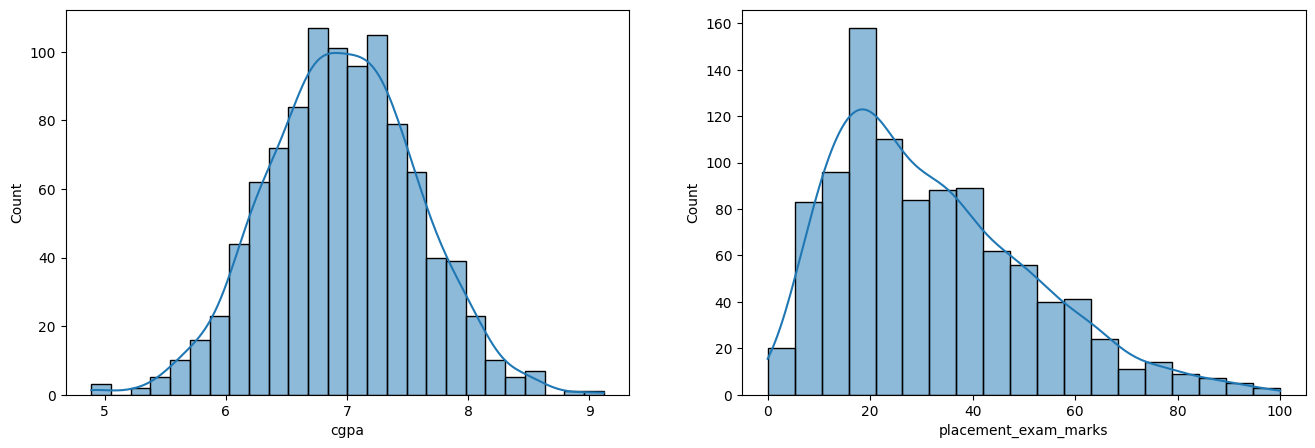

In [19]:
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['cgpa'], kde=True)
plt.subplot(1, 2, 2)
sns.histplot(df['placement_exam_marks'], kde=True)

plt.show()


- From the above graph we can use _Z-Score_ transformation only on 'cgpa' column. Which is _Normally Distributed_.
- The 'placement_exam_marks' is _positive skewed_. So we can not apply the _Z-Score_ on 'placement_exam_marks' column.

In [20]:
print("Mean(cgpa) :", df['cgpa'].mean())
print("Std(cgpa) :", df['cgpa'].std())
print("Min(cgpa) :", df['cgpa'].min())
print("Max(cgpa) :", df['cgpa'].max())

Mean(cgpa) : 6.96124
Std(cgpa) : 0.6158978751323896
Min(cgpa) : 4.89
Max(cgpa) : 9.12


In [21]:
# Finding the boundary values
print("Highes allowed ", df['cgpa'].mean() + 3*df['cgpa'].std())
print("Lowest allowed ", df['cgpa'].mean() - 3*df['cgpa'].std())

Highes allowed  8.808933625397168
Lowest allowed  5.113546374602832


In [23]:
# Finding the outliers
df[(df['cgpa'] > 8.80) | (df['cgpa'] < 5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


## **Trimming**

In [25]:
# Triming
ndf = df[(df['cgpa'] < 8.80) & (df['cgpa'] > 5.11)]
ndf.sample(7)

,cgpa,placement_exam_marks,placed
93,7.00,30.0,0
356,5.91,50.0,1
768,6.55,63.0,1
84,5.65,35.0,1
627,6.31,30.0,1
190,7.54,23.0,0
928,6.63,32.0,0


In [26]:
ndf.shape

(995, 3)

In [27]:
# Approach 2
# Calculating the Z-Score
df['cgpa_zscore'] = (df['cgpa'] - df['cgpa'].mean()) / (df['cgpa'].std())
df.head(5)

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


- After getting the new column of cgpa_zscore we check if any value is not in the range of [-3, 3] then that is outlier.

In [28]:
df[df['cgpa_zscore'] > 3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [29]:
df[df['cgpa_zscore'] < -3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [30]:
df[(df['cgpa_zscore'] > 3) | (df['cgpa_zscore'] < -3)]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [31]:
ndf = df[(df['cgpa_zscore'] < 3) & (df['cgpa_zscore'] > -3)]
ndf

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


## **Capping**

In [32]:
upper_limit = df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3*df['cgpa'].std()
upper_limit, lower_limit

(8.808933625397168, 5.113546374602832)

In [35]:
# np.where(x, y, z)
# x : condition
# if(x=True) then y
# else(x=False) then z

df['cgpa'] = np.where(
    df['cgpa'] > upper_limit,  # X
    upper_limit,  # Y
    np.where(df['cgpa'] < lower_limit, lower_limit, df['cgpa']) # (x, y, z) Z
)                       


In [36]:
df['cgpa'].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64

In [37]:
df.shape

(1000, 4)

In [38]:
df['cgpa'].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64

In [39]:
df.sample(7)

,cgpa,placement_exam_marks,placed,cgpa_zscore
196,7.28,34.0,1,0.517553
129,6.81,39.0,1,-0.245560
446,6.60,23.0,1,-0.586526
867,8.04,26.0,0,1.751524
432,6.67,26.0,1,-0.472871
206,7.50,25.0,0,0.874755
8,6.45,38.0,0,-0.830073
